In [16]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

* `Load Dataset`

In [17]:
# Load Fashion MNIST
tf.random.set_seed(2024)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [18]:
print('Train Data shape =>', X_train_full.shape)
print('Train Labels shape =>', y_train_full.shape)
print('----'*10)
print('Test Data shape =>', X_test.shape)
print('Test Labels shape =>', y_test.shape)

Train Data shape => (60000, 28, 28)
Train Labels shape => (60000,)
----------------------------------------
Test Data shape => (10000, 28, 28)
Test Labels shape => (10000,)


* `Processing`

In [19]:
# for training
X_train_full = np.expand_dims(X_train_full, axis=-1).astype('float32') / 255.0
y_train_full = y_train_full.astype('int32')

# for testing
X_test = np.expand_dims(X_test, axis=-1).astype('float32') / 255.0
y_test = y_test.astype('int32')

print('Train Data shape =>', X_train_full.shape)
print('Train Labels shape =>', y_train_full.shape)
print('----'*10)
print('Test Data shape =>', X_test.shape)
print('Test Labels shape =>', y_test.shape)

Train Data shape => (60000, 28, 28, 1)
Train Labels shape => (60000,)
----------------------------------------
Test Data shape => (10000, 28, 28, 1)
Test Labels shape => (10000,)


* `Split Dataset`

In [20]:
# Split train to train & valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.1,
                                                      shuffle=True,
                                                      stratify=y_train_full)

print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)

print('----'*10)

print('X_val shape =>', X_valid.shape)
print('y_val shape =>', y_valid.shape)

print('----'*10)

print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (54000, 28, 28, 1)
y_train shape => (54000,)
----------------------------------------
X_val shape => (6000, 28, 28, 1)
y_val shape => (6000,)
----------------------------------------
X_test shape => (10000, 28, 28, 1)
y_test shape => (10000,)


* `Visualization`

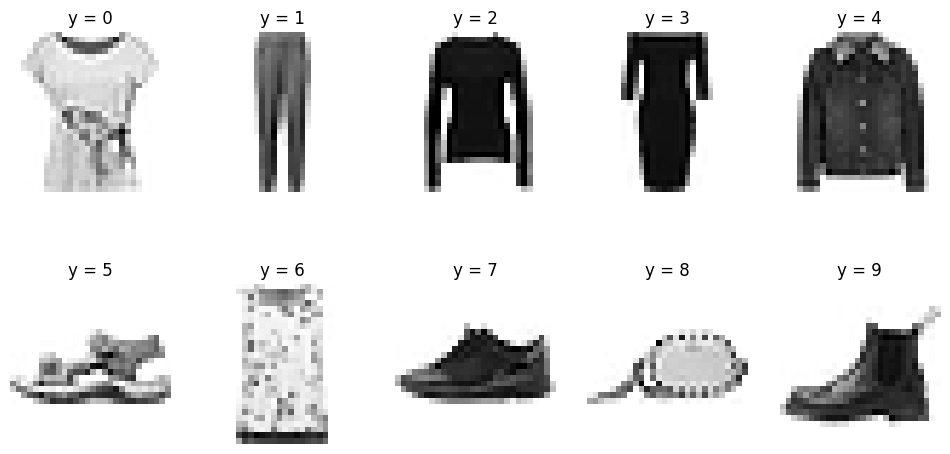

In [21]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])
img_indicies = {}   # label: index
for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]
keys = list(img_indicies.keys())

# Plotting
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

label = 0
for row in range(2):
  for col in range(5):
    plt.sca(ax[row, col])
    plt.imshow(X_train[img_indicies[label]], cmap='binary')
    plt.title(f'y = {keys[label]}', fontsize=12, c='k')
    plt.axis('off')
    label += 1

In [22]:
# you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot']

print('y_train in row 1 =>', y_train[0])
print('get its corresponding class =>', class_names[y_train[0]])

y_train in row 1 => 8
get its corresponding class => Bag


* `Model`

In [23]:
model = tf.keras.models.Sequential([
    # conv base
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    # top classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

early_stopp = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

# fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=10,
                    batch_size=32,
                    callbacks=[early_stopp])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7269 - loss: 0.7392 - val_accuracy: 0.8523 - val_loss: 0.4007
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8767 - loss: 0.3413 - val_accuracy: 0.8837 - val_loss: 0.3245
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8968 - loss: 0.2843 - val_accuracy: 0.8852 - val_loss: 0.3106
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9095 - loss: 0.2511 - val_accuracy: 0.8840 - val_loss: 0.3188
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9186 - loss: 0.2251 - val_accuracy: 0.8825 - val_loss: 0.3456
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9262 - loss: 0.2051 - val_accuracy: 0.8908 - val_loss: 0.3208
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9318 - loss: 0.1922 - val_accuracy: 0.8920 - val_loss: 0.3473


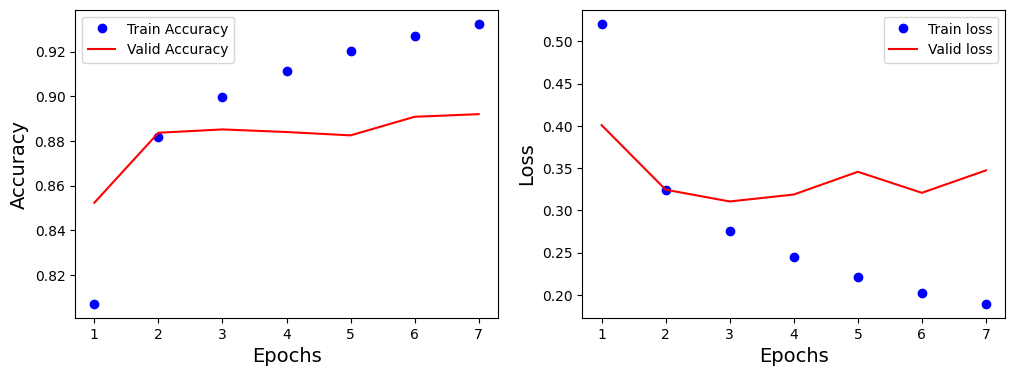

In [39]:
fia, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

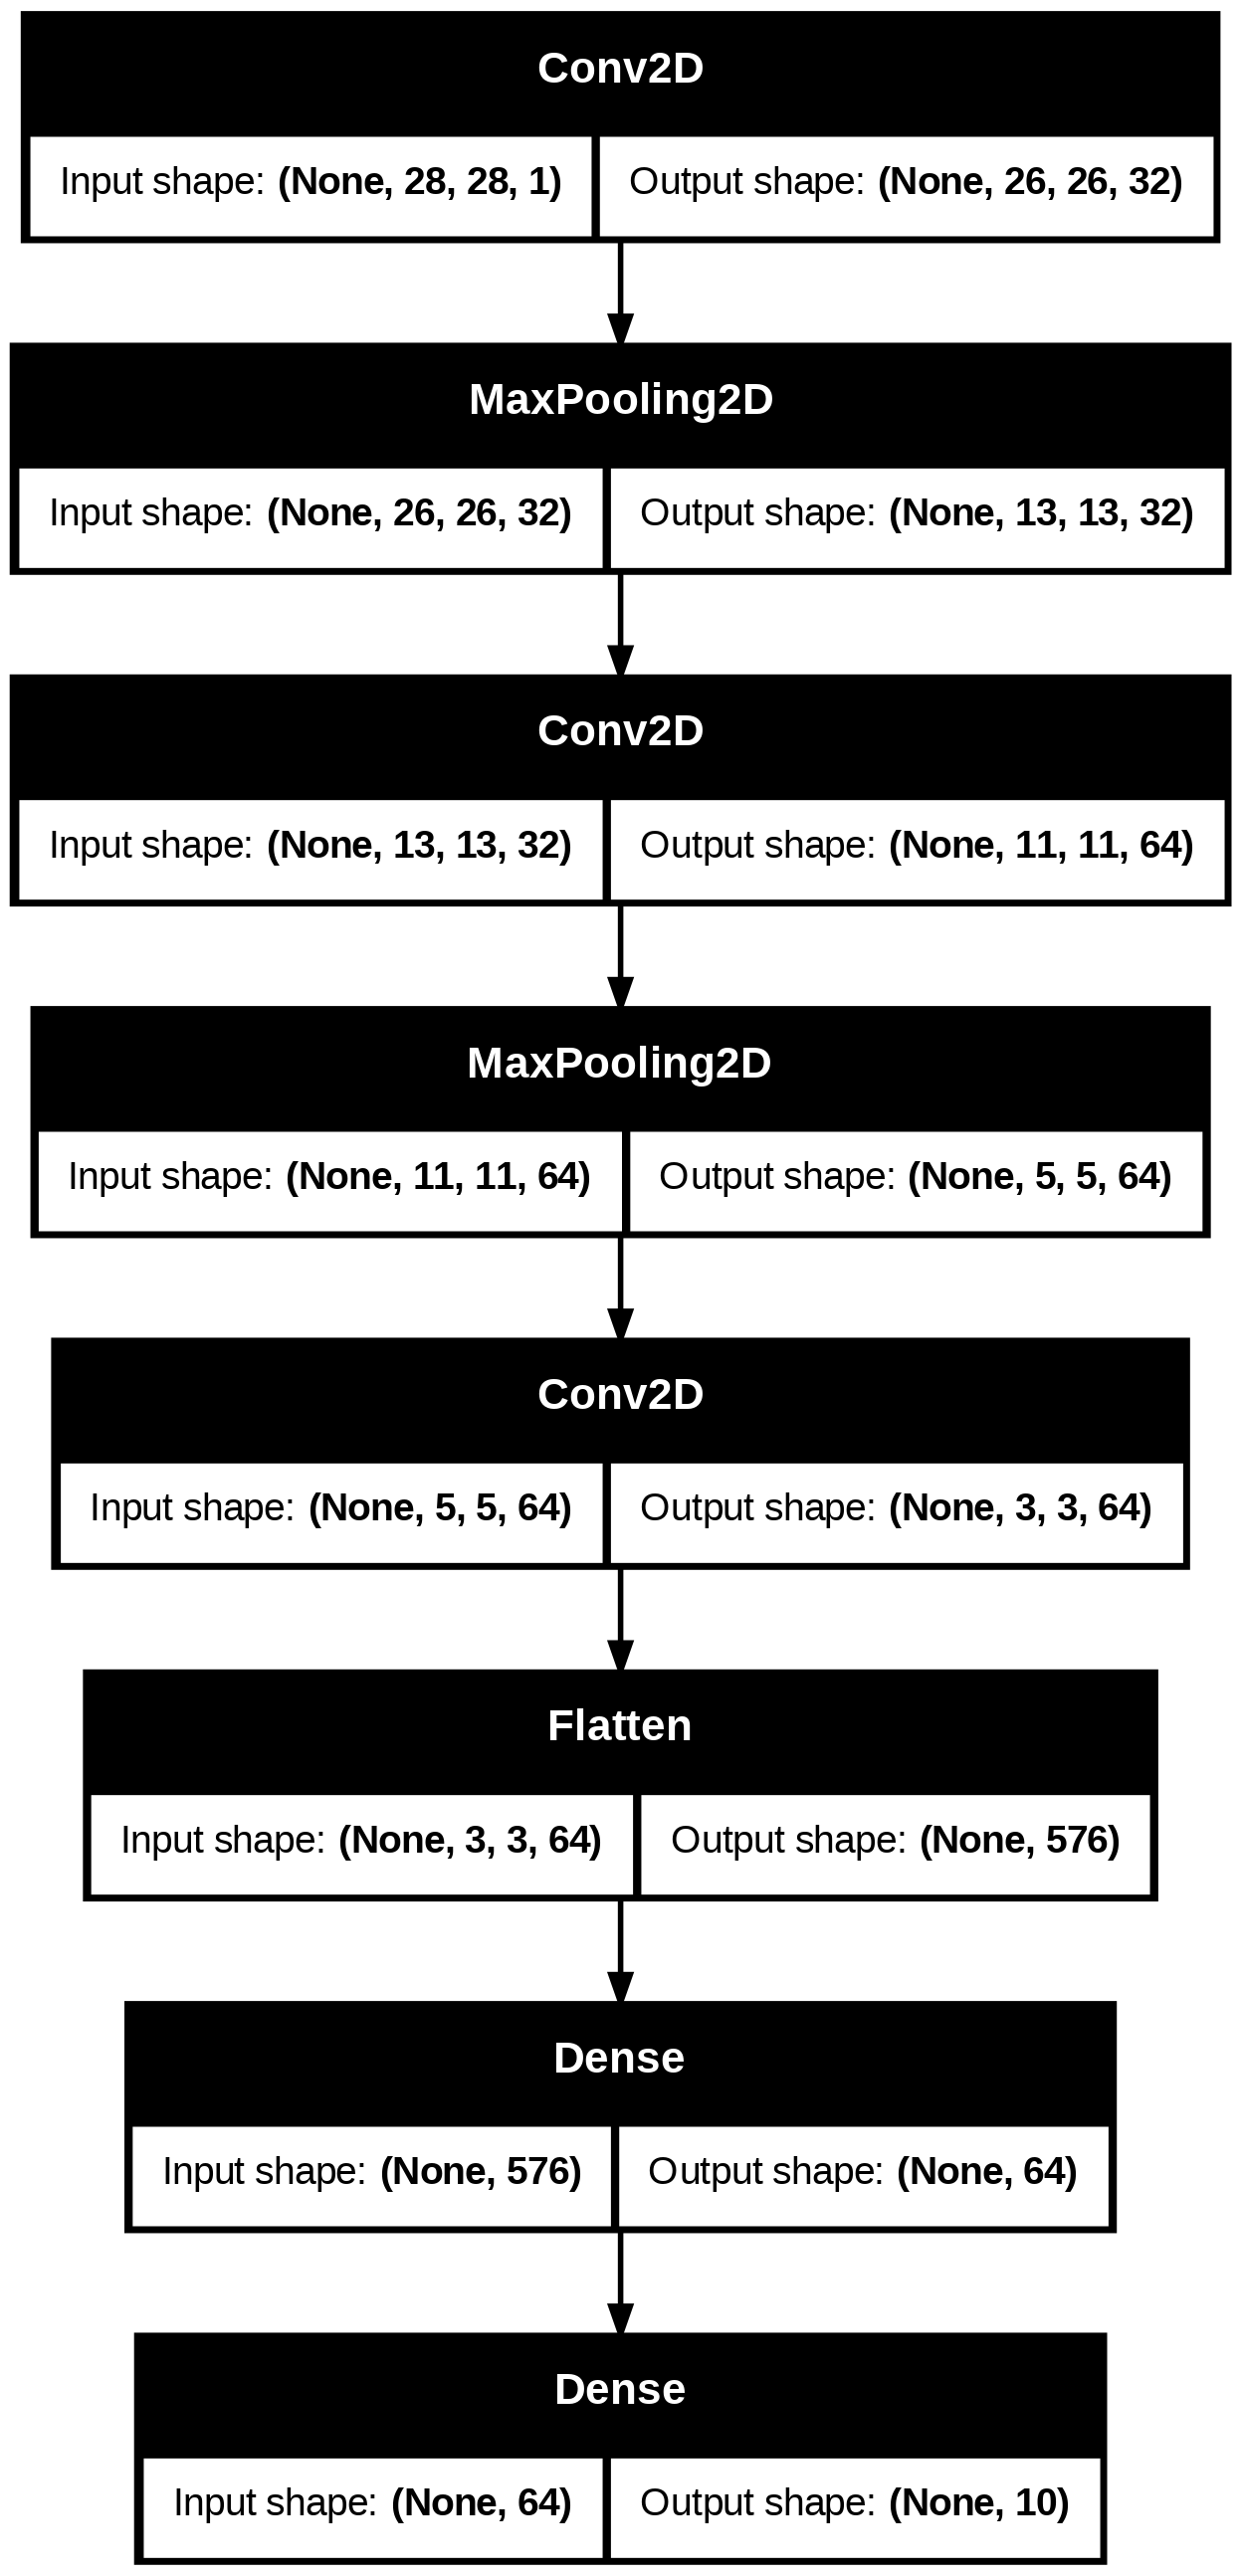

In [40]:
# plot model
tf.keras.utils.plot_model(model, show_shapes=True)

In [41]:
# check layers
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [42]:
# W & b
weights, biases = model.layers[0].get_weights()
weights.shape, biases.shape

((3, 3, 1, 32), (32,))

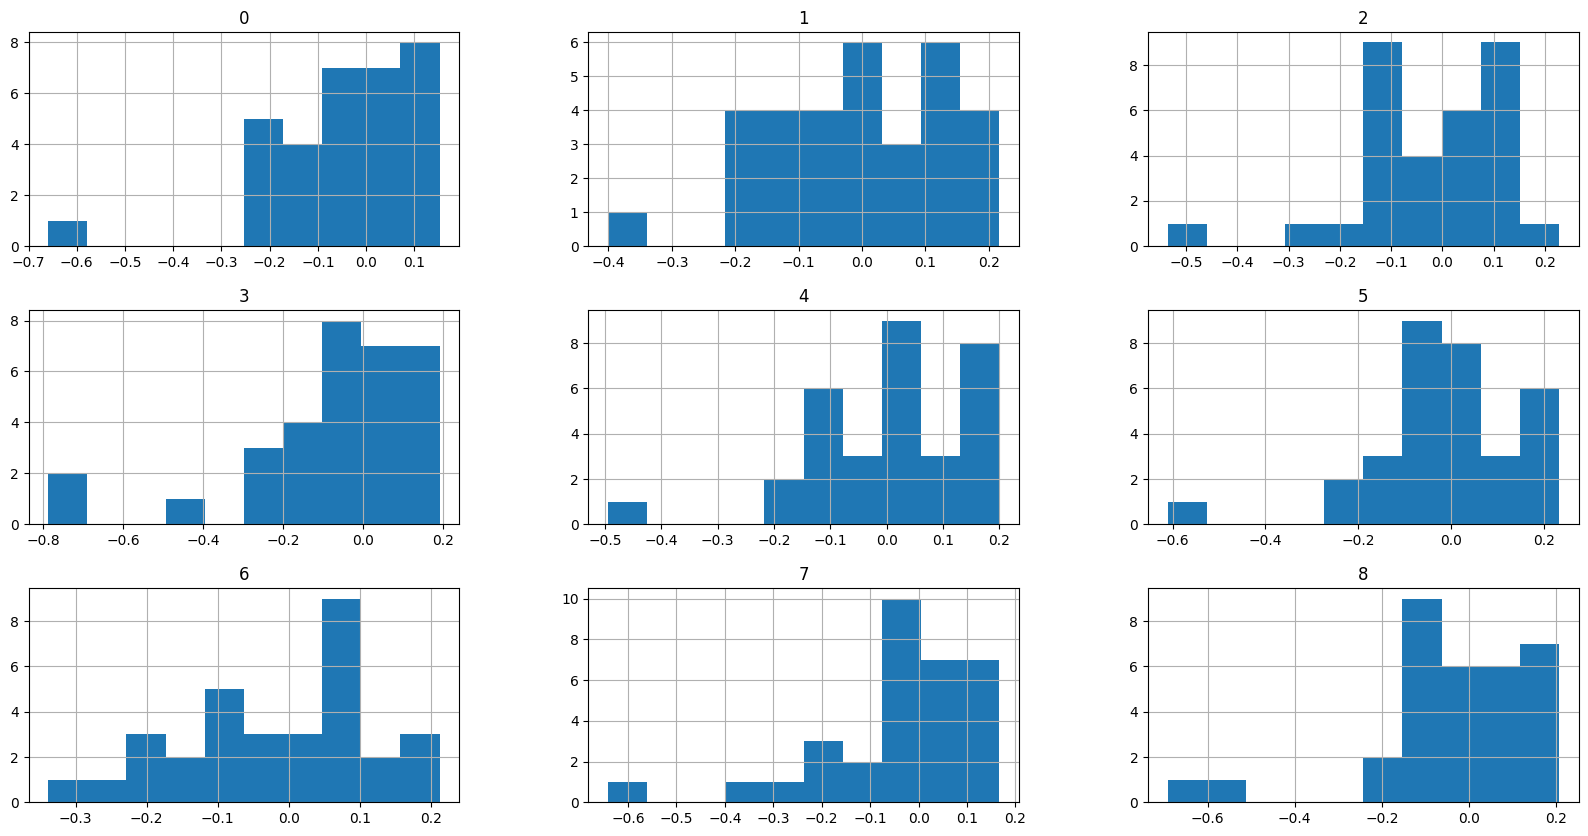

In [43]:
# check for each filter
pd.DataFrame(weights.reshape(32, -1)).hist(bins=10, figsize=(20, 10))
plt.show()

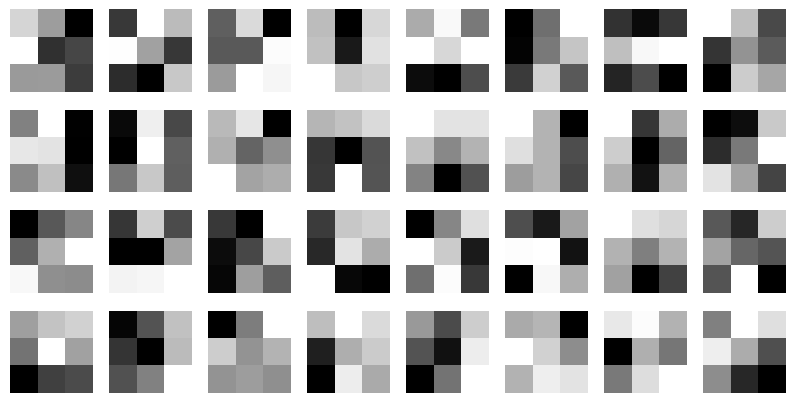

In [44]:
# Plot the first few filters
fig, axes = plt.subplots(4, 8, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    if i < weights.shape[-1]:
        ax.imshow(weights[:, :, 0, i], cmap='gray')  # for each filter & here I have only 1 input channel for that layer
        ax.axis('off')

plt.show()

In [45]:
# evaluate on test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test_loss =>', test_loss)
print('test_acc =>', test_acc)

test_loss => 0.33151206374168396
test_acc => 0.8781999945640564


In [46]:
ASSETS_FOLDER_PATH = os.path.join(os.getcwd(), 'assets')
os.makedirs(ASSETS_FOLDER_PATH, exist_ok=True)

In [47]:
# save model
model.save(os.path.join(ASSETS_FOLDER_PATH, "model.keras"))

* `Dump some images`

In [48]:
# Revert normalization and dimension expansion
for i, img_array in enumerate(X_test[:3]):
    img_array = (img_array * 255).astype(np.uint8)  # Convert back to 0-255 range
    img_array = np.squeeze(img_array)               # Remove extra channel (28, 28, 1) -> (28, 28)
    img = Image.fromarray(img_array, mode="L")      # "L" mode for grayscale images
    output_path = os.path.join(ASSETS_FOLDER_PATH, f'test_image_{i}.png')
    img.save(output_path)
print("Images saved successfully.")

Images saved successfully.


/tmp/ipython-input-1973773501.py:5: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(img_array, mode="L")      # "L" mode for grayscale images


* `sample on test dataset`

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Predicted Labels:  [9 2 1]
Predicted Class Names:  ['Ankle_Boot', 'Pullover', 'Trouser']


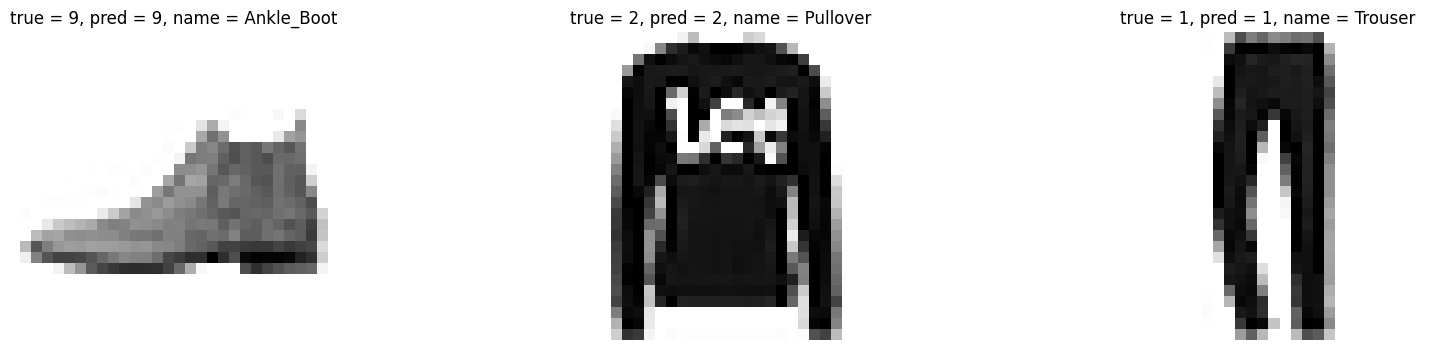

In [49]:
# Example of sample of new data point
X_new = X_test[:3]
y_new = y_test[:3]

y_pred_new = np.argmax(model.predict(X_new), axis=-1)
print('Predicted Labels: ', y_pred_new)

# To get thier class_names
y_pred_names = [class_names[y_pred_new[i]] for i in range(len(y_pred_new))]
print('Predicted Class Names: ', y_pred_names)

# visualize what we get in this cell
print('==='*25)
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

plt.sca(ax[0])
plt.imshow(X_new[0], cmap='binary')
plt.title(f'true = {y_new[0]}, pred = {y_pred_new[0]}, name = {y_pred_names[0]}')
plt.axis('off')
plt.sca(ax[1])
plt.imshow(X_new[1], cmap='binary')
plt.title(f'true = {y_new[1]}, pred = {y_pred_new[1]}, name = {y_pred_names[1]}')
plt.axis('off')
plt.sca(ax[2])
plt.imshow(X_new[2], cmap='binary')
plt.title(f'true = {y_new[2]}, pred = {y_pred_new[2]}, name = {y_pred_names[2]}')
plt.axis('off');

-----

* `Inference`

In [50]:
import tensorflow as tf
import numpy as np
from PIL import Image

In [51]:
# Load model
model = tf.keras.models.load_model(os.path.join(ASSETS_FOLDER_PATH, "model.keras"))
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot']

In [52]:
def inference(image_path: str):
    # Open and preprocess the image
    img = Image.open(image_path)
    if img.mode != 'L':
        img = img.convert('L')

    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    # Reshape for model input
    img_array = np.expand_dims(img_array, axis=(0, -1))

    # Make prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction, axis=-1)[0]
    predicted_name = class_names[predicted_class]
    print(prediction)
    return {
        'class_index': int(predicted_class),
        'class_name': predicted_name,
        'confidence': float(prediction[0][predicted_class] * 100)
    }


# example
inference(image_path="/content/assets/test_image_0.png")

[[2.3586666e-09 1.1166669e-07 8.0724497e-08 2.7234922e-08 1.1563775e-08
  4.7060264e-05 9.8076725e-08 1.4096709e-04 1.3927765e-07 9.9981141e-01]]


{'class_index': 9, 'class_name': 'Ankle_Boot', 'confidence': 99.98114013671875}